<a href="https://colab.research.google.com/github/Me-lab-c/Brainwave_Matrix_Intern/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re

In [ ]:
# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load datasets
twitter_data = pd.read_csv("/content/Twitter_Data.csv")
reddit_data = pd.read_csv("/content/Reddit_Data.csv")


In [ ]:
# Display first few rows to understand structure
print("Twitter Data Sample:")
print(twitter_data.head())
print("\nReddit Data Sample:")
print(reddit_data.head())

Twitter Data Sample:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Reddit Data Sample:
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1


In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.strip()
    return text

In [ ]:
# Apply preprocessing
twitter_data['clean_text'] = twitter_data.iloc[:, 0].apply(preprocess_text)  # Assuming first column has text
reddit_data['clean_text'] = reddit_data.iloc[:, 0].apply(preprocess_text)  # Assuming first column has text


In [ ]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']


In [ ]:
# Apply sentiment analysis
twitter_data['sentiment_score'] = twitter_data['clean_text'].apply(get_sentiment_score)
reddit_data['sentiment_score'] = reddit_data['clean_text'].apply(get_sentiment_score)


In [ ]:
# Classify sentiments
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

twitter_data['sentiment'] = twitter_data['sentiment_score'].apply(classify_sentiment)
reddit_data['sentiment'] = reddit_data['sentiment_score'].apply(classify_sentiment)


<ipython-input-10-849186b21bb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=twitter_data, palette='coolwarm')


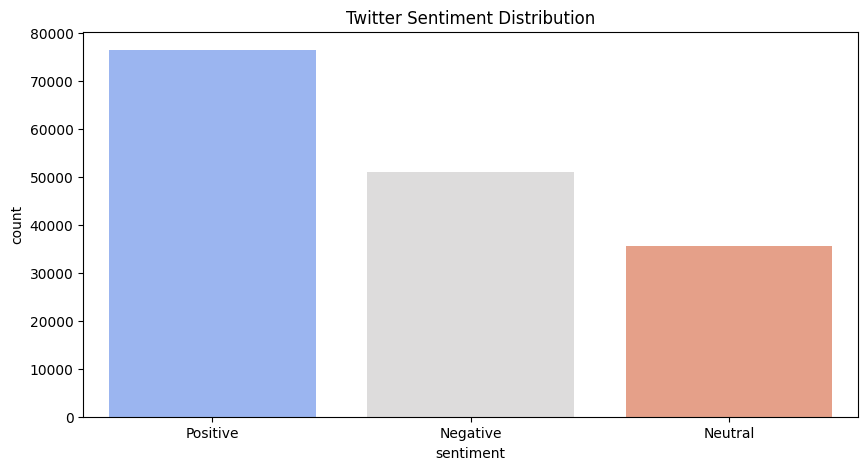

<ipython-input-10-849186b21bb0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=reddit_data, palette='coolwarm')


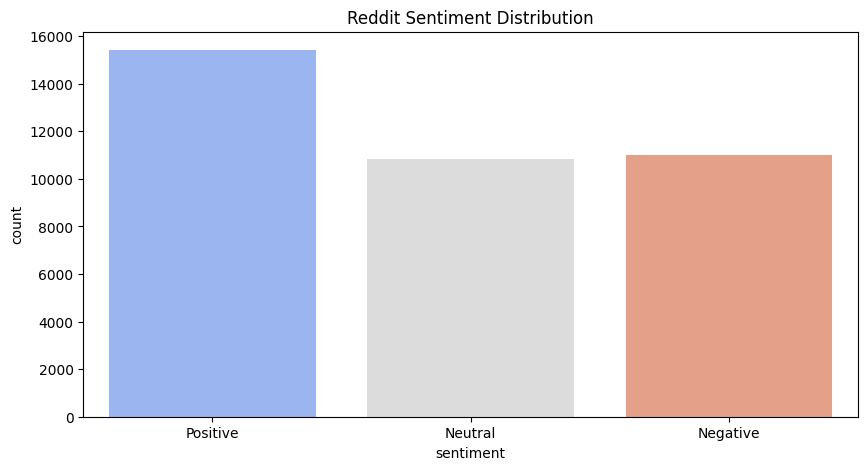

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=twitter_data, palette='coolwarm')
plt.title('Twitter Sentiment Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=reddit_data, palette='coolwarm')
plt.title('Reddit Sentiment Distribution')
plt.show()

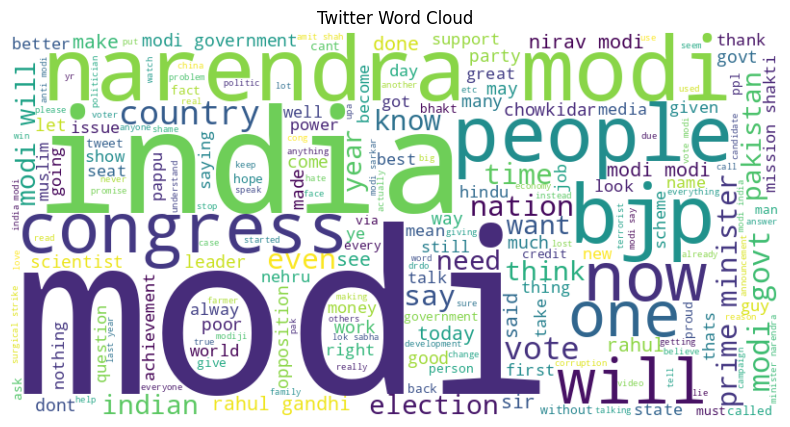

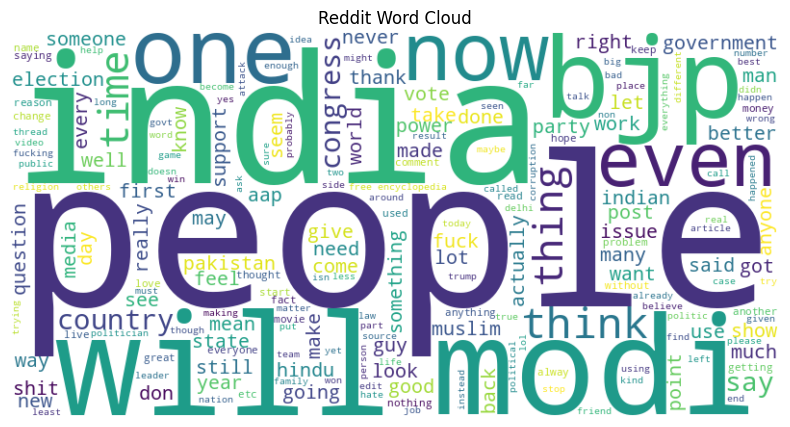

In [ ]:
# Word Clouds
twitter_text = ' '.join(twitter_data['clean_text'])
reddit_text = ' '.join(reddit_data['clean_text'])

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(twitter_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Twitter Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reddit_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reddit Word Cloud')
plt.show()


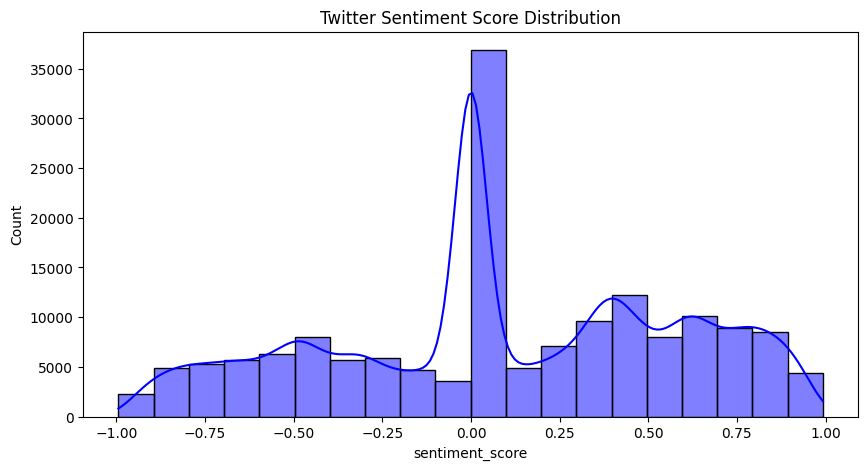

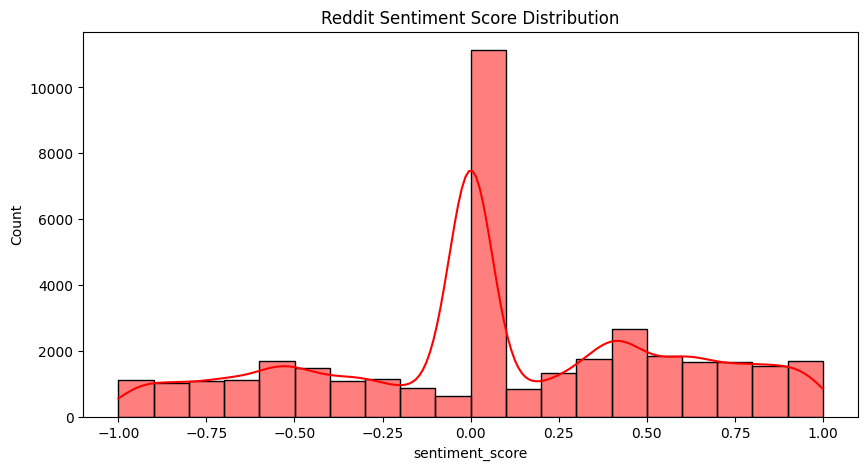

In [ ]:
# Sentiment Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(twitter_data['sentiment_score'], bins=20, kde=True, color='blue')
plt.title('Twitter Sentiment Score Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(reddit_data['sentiment_score'], bins=20, kde=True, color='red')
plt.title('Reddit Sentiment Score Distribution')
plt.show()

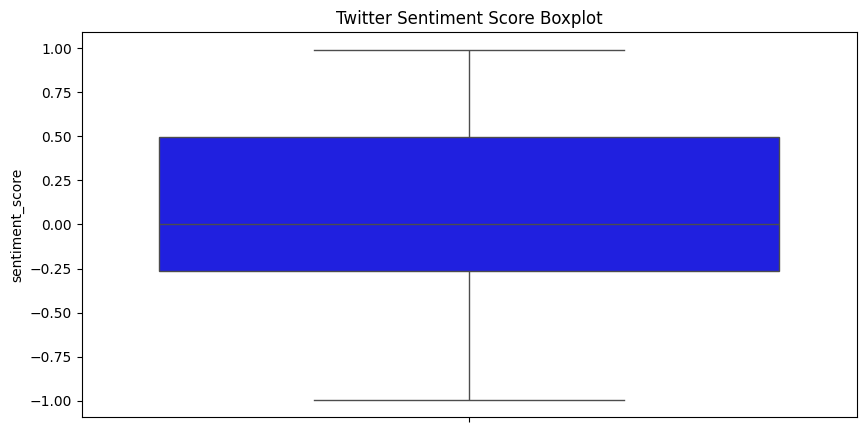

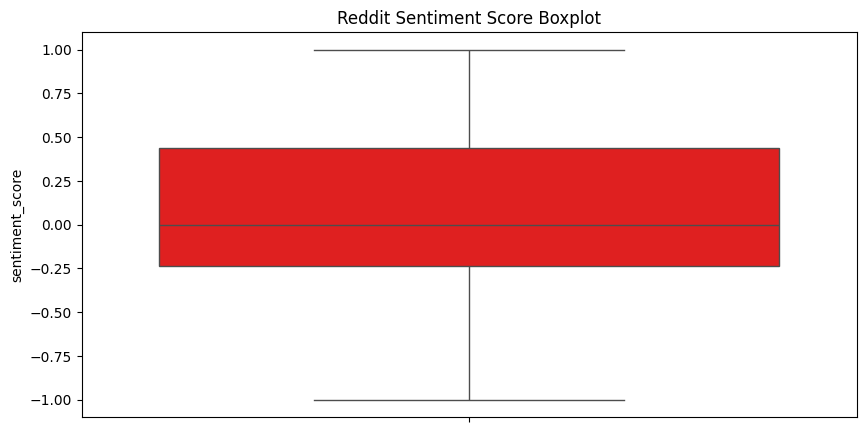

In [ ]:
# Box Plot for Sentiment Scores
plt.figure(figsize=(10, 5))
sns.boxplot(y=twitter_data['sentiment_score'], color='blue')
plt.title('Twitter Sentiment Score Boxplot')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(y=reddit_data['sentiment_score'], color='red')
plt.title('Reddit Sentiment Score Boxplot')
plt.show()

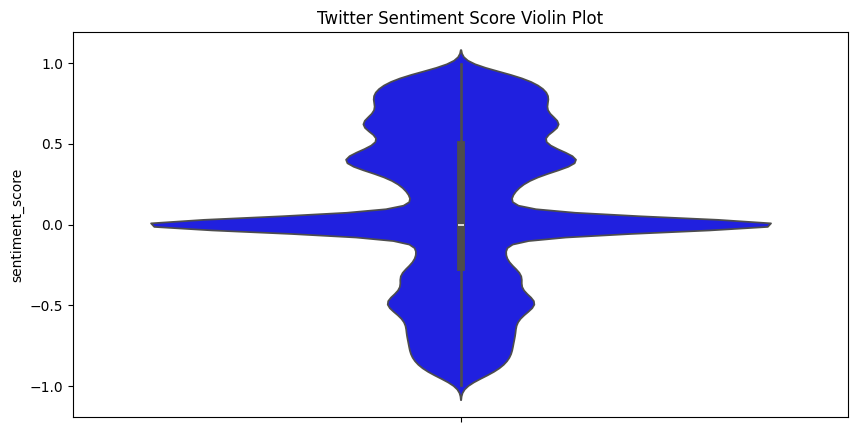

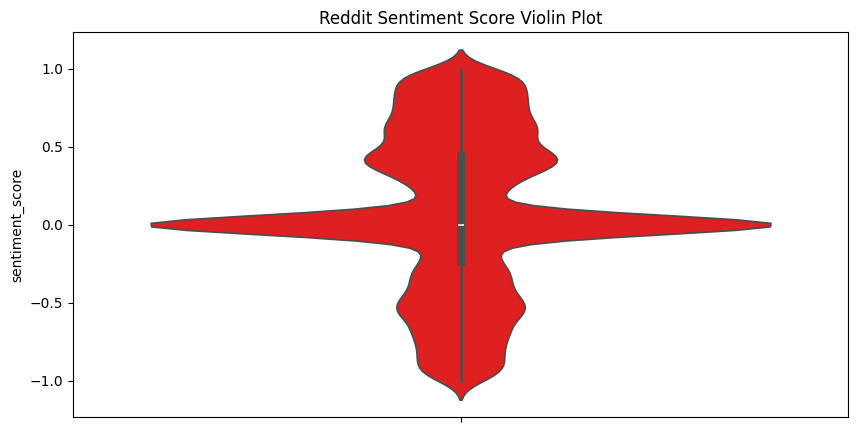

In [ ]:
# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(y=twitter_data['sentiment_score'], color='blue')
plt.title('Twitter Sentiment Score Violin Plot')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(y=reddit_data['sentiment_score'], color='red')
plt.title('Reddit Sentiment Score Violin Plot')
plt.show()

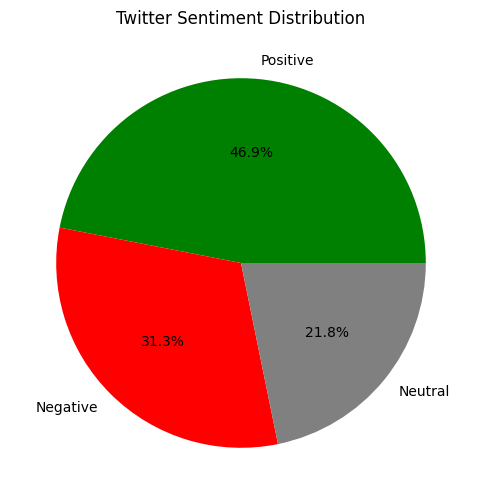

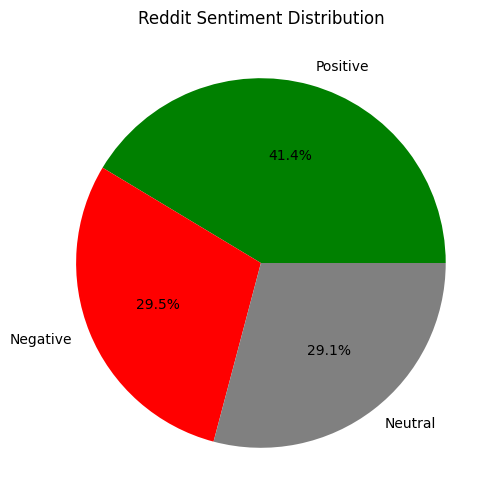

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
twitter_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Twitter Sentiment Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
reddit_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Reddit Sentiment Distribution')
plt.ylabel('')
plt.show()

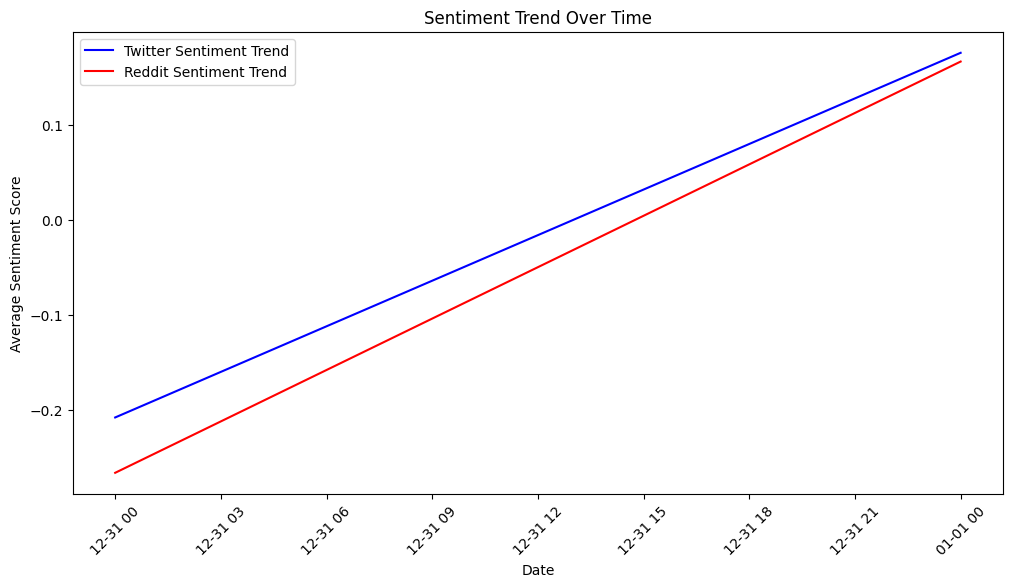

In [ ]:
# Line Graph for Sentiment Trends
twitter_data['date'] = pd.to_datetime(twitter_data.iloc[:, 1], errors='coerce')
reddit_data['date'] = pd.to_datetime(reddit_data.iloc[:, 1], errors='coerce')

twitter_trend = twitter_data.groupby(twitter_data['date'].dt.date)['sentiment_score'].mean()
reddit_trend = reddit_data.groupby(reddit_data['date'].dt.date)['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
plt.plot(twitter_trend, label='Twitter Sentiment Trend', color='blue')
plt.plot(reddit_trend, label='Reddit Sentiment Trend', color='red')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save processed data
twitter_data.to_csv("Processed_Twitter_Data.csv", index=False)
reddit_data.to_csv("Processed_Reddit_Data.csv", index=False)

print("Sentiment analysis completed and saved.")


Sentiment analysis completed and saved.
